<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" siz
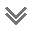

In [12]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
soup = BeautifulSoup(soup.text, "lxml")
soup

In [2]:
table_code = soup.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [3]:
tags = table_code.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [4]:
data = []
for tag in tags:
    y = tag.text.split('\n')
    if y[1] != '':
        data.append(y[1:])
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '107,481,826',
  '',
  '1,169,682                                ',
  '',
  '105,613,083',
  '',
  '699,061',
  '701',
  '321,028',
  '3,494',
  '1,181,033,919',
  '3,527,525',
  '334,805,269 ',
  'North America',
  '',
  '32860',
  '',
  '',
  '2,088',
  ''],
 ['2',
  'India',
  '44,995,311',
  '',
  '531,915                                ',
  '',
  '44,461,932',
  '',
  '1,464',
  'N/A',
  '31,988',
  '378',
  '930,797,975',
  '661,721',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6442',
  '',
  '',
  '1',
  ''],
 ['3',
  'France',
  '40,138,560',
  '',

In [5]:
import csv
file = open('covid.csv','w')
x = csv.writer(file)
x.writerows(data)
file.close()

In [6]:
import pandas as pd
df = pd.read_csv('covid.csv', encoding = 'latin1')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
0,1,USA,"107,481,826",NaN,"1,169,682",NaN,"105,613,083",NaN,"699,061",701.0,...,"3,527,525","334,805,269",North America,NaN,32860,NaN,NaN,"2,088",NaN,NaN
1,2,India,"44,995,311",NaN,"531,915",NaN,"44,461,932",NaN,"1,464",NaN,...,"661,721","1,406,631,776",Asia,NaN,"312,6442",NaN,NaN,1,NaN,NaN
2,3,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,869.0,...,"4,139,547","65,584,518",Europe,NaN,23910,NaN,NaN,NaN,NaN,NaN
3,4,Germany,"38,428,685",NaN,"174,352",NaN,"38,240,600",NaN,"13,733",NaN,...,"1,458,359","83,883,596",Europe,NaN,24811,NaN,NaN,164,NaN,NaN
4,5,Brazil,"37,717,062",NaN,"704,659",NaN,"36,249,161",NaN,"763,242",NaN,...,"296,146","215,353,593",South America,NaN,63063,NaN,NaN,"3,544",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,Tokelau,80,NaN,,NaN,NaN,NaN,80,NaN,...,NaN,"1,378",Australia/Oceania,NaN,17,NaN,NaN,"58,055",NaN,NaN
227,228,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,...,NaN,799,Europe,NaN,28,NaN,NaN,NaN,NaN,NaN
228,229,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,...,NaN,"626,161",Africa,NaN,"62,616626,161",NaN,NaN,NaN,NaN,NaN
229,230,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import pandas as pd
df = pd.read_csv('covid.csv', encoding = 'latin1',
                 usecols = ['Country,Other','TotalCases','TotalDeaths','TotalRecovered'])
df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered
0,USA,"107,481,826","1,169,682","105,613,083"
1,India,"44,995,311","531,915","44,461,932"
2,France,"40,138,560","167,642","39,970,918"
3,Germany,"38,428,685","174,352","38,240,600"
4,Brazil,"37,717,062","704,659","36,249,161"
...,...,...,...,...
226,Tokelau,80,,NaN
227,Vatican City,29,,29
228,Western Sahara,10,1,9
229,MS Zaandam,9,2,7


In [8]:
df = df.dropna().head(20)

In [9]:
df['TotalCases'] = list(map(lambda x:int(x.replace(',','')), list(df['TotalCases'])))
df['TotalDeaths'] = list(map(lambda x:int(x.replace(',','')), list(df['TotalDeaths'])))
df['TotalRecovered'] = list(map(lambda x:int(x.replace(',','')), list(df['TotalRecovered'])))

df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered
0,USA,107481826,1169682,105613083
1,India,44995311,531915,44461932
2,France,40138560,167642,39970918
3,Germany,38428685,174352,38240600
4,Brazil,37717062,704659,36249161
6,S. Korea,32883134,35216,32348806
7,Italy,25908353,190987,25605377
8,UK,24641596,228144,24411633
9,Russia,22974289,399814,22424710
11,Spain,13914811,121760,13762417


In [14]:
import plotly.express as px
fig = px.bar(df, x='Country,Other', y='TotalRecovered')
fig.show()

In [16]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='TotalCases', x=df['Country,Other'], y=df['TotalCases']),
    go.Bar(name='TotalRecovered', x=df['Country,Other'], y=df['TotalRecovered'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [17]:
import plotly.express as px
fig = px.pie(df, values='TotalCases', names='Country,Other', title='Covid Cases of 20 countries')
fig.show()